## GAN Training

#### MNIST Dataset Generation

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters
batch_size = 128
descriminator_lr = 0.0002
generator_lr = 0.0002
latent_dim = 100
num_epochs = 20

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Prepare the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [5]:
dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 26.4M/26.4M [00:08<00:00, 3.27MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.97MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.71MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [6]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512,1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024,28*28),
            nn.Tanh()
            
        )

    def forward(self, z):
        img = self.model(z)
        img=img.view(img.size(0),1,28,28)
        return img

In [7]:
#Define the Discriminator
# Define the Generator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    # Correctly indented forward method
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity


In [8]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=generator_lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=descriminator_lr, betas=(0.5, 0.999))


In [9]:
#Fixed noise for consistent image generation
fixed_z = torch.randn(16, latent_dim).to(device)

In [10]:
def weight_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
generator.apply(weight_init)



Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Linear(in_features=1024, out_features=784, bias=True)
    (10): Tanh()
  )
)

In [11]:
discriminator.apply(weight_init)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [12]:
#Track Losses
g_losses=[]
d_losses=[]

Epoch [1/20]                        Batch 100/469 Discriminator Loss: 0.5442 Generator Loss: 2.0602
Epoch [1/20]                        Batch 200/469 Discriminator Loss: 0.5148 Generator Loss: 1.4694
Epoch [1/20]                        Batch 300/469 Discriminator Loss: 0.5242 Generator Loss: 1.0996
Epoch [1/20]                        Batch 400/469 Discriminator Loss: 0.5039 Generator Loss: 1.3645
Epoch [2/20]                        Batch 100/469 Discriminator Loss: 0.5230 Generator Loss: 1.2553
Epoch [2/20]                        Batch 200/469 Discriminator Loss: 0.5742 Generator Loss: 1.5668
Epoch [2/20]                        Batch 300/469 Discriminator Loss: 0.4918 Generator Loss: 1.3120
Epoch [2/20]                        Batch 400/469 Discriminator Loss: 0.5100 Generator Loss: 1.7336
Epoch [3/20]                        Batch 100/469 Discriminator Loss: 0.5693 Generator Loss: 1.5396
Epoch [3/20]                        Batch 200/469 Discriminator Loss: 0.5238 Generator Loss: 1.4949


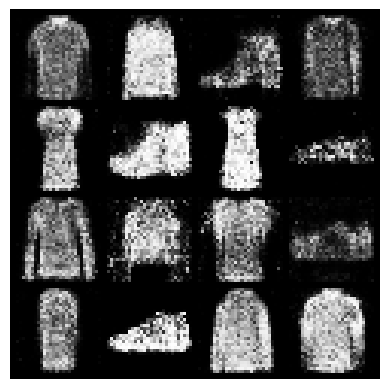

Epoch [11/20]                        Batch 100/469 Discriminator Loss: 0.5488 Generator Loss: 1.2481
Epoch [11/20]                        Batch 200/469 Discriminator Loss: 0.5615 Generator Loss: 1.6802
Epoch [11/20]                        Batch 300/469 Discriminator Loss: 0.5287 Generator Loss: 1.4110
Epoch [11/20]                        Batch 400/469 Discriminator Loss: 0.5476 Generator Loss: 1.4517
Epoch [12/20]                        Batch 100/469 Discriminator Loss: 0.5439 Generator Loss: 1.1925
Epoch [12/20]                        Batch 200/469 Discriminator Loss: 0.5075 Generator Loss: 1.1500
Epoch [12/20]                        Batch 300/469 Discriminator Loss: 0.5255 Generator Loss: 1.5582
Epoch [12/20]                        Batch 400/469 Discriminator Loss: 0.5423 Generator Loss: 1.2743
Epoch [13/20]                        Batch 100/469 Discriminator Loss: 0.5393 Generator Loss: 1.4997
Epoch [13/20]                        Batch 200/469 Discriminator Loss: 0.5593 Generator Los

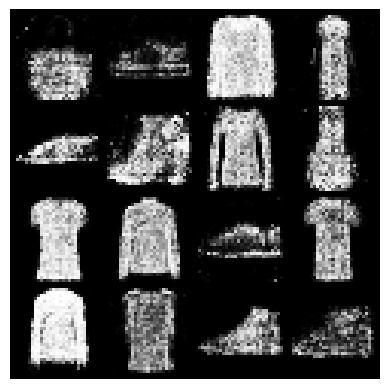

In [13]:
# Training loop
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
       # Convert list to tensor
        real_images = imgs.to(device) 
        batch_size  = imgs.shape[0]
        # Adversarial ground truths
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)
        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Sample noise as generator input
        z = torch.randn(real_images.size(0), latent_dim, device=device)
        # Generate a batch of images
        fake_images = generator(z)

        # Measure discriminator's ability 
        # to classify real and fake images
        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()
        # Generate a batch of images
        gen_images = generator(z)
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        # ---------------------
        #  Progress Monitoring
        # ---------------------
        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    # Save generated images for every epoch
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()


In [14]:
for epoch in range(num_epochs):
        for i, (real_imgs, _) in enumerate(dataloader):
            batch_size = real_imgs.size(0)

            # Move real images to the device
            real_imgs = real_imgs.to(device)

            # Generate labels for real (1) and fake (0)
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # ---------------------
            # Train Generator
            # ---------------------
            optimizer_G.zero_grad()

            # Generate fake images
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_imgs = generator(z)

            # Compute generator loss (fool the discriminator)
            g_loss = adversarial_loss(discriminator(fake_imgs), real_labels)

            # Backpropagation and optimization
            g_loss.backward()
            optimizer_G.step()

            # ---------------------
            # Train Discriminator
            # ---------------------
            optimizer_D.zero_grad()

            # Compute discriminator loss on real images
            real_loss = adversarial_loss(discriminator(real_imgs), real_labels)

            # Compute discriminator loss on fake images
            fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)

            # Combine losses
            d_loss = (real_loss + fake_loss) / 2

            # Backpropagation and optimization
            d_loss.backward()
            optimizer_D.step()

            # Track losses
            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

            # Print training progress
            if i % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(dataloader)}] Loss D: {d_loss:.4f}, Loss G: {g_loss:.4f}")

        # # Generate and save sample images
        # with torch.no_grad():
        #     sample_imgs = generator(fixed_z).cpu()
        #     save_image(sample_imgs, f"samples/epoch_{epoch+1}.png", nrow=4, normalize=True)

print("Training complete!")

Epoch [1/20] Batch [0/469] Loss D: 0.5481, Loss G: 1.2166
Epoch [1/20] Batch [100/469] Loss D: 0.4259, Loss G: 1.3200
Epoch [1/20] Batch [200/469] Loss D: 0.4997, Loss G: 1.9136
Epoch [1/20] Batch [300/469] Loss D: 0.5062, Loss G: 1.7653
Epoch [1/20] Batch [400/469] Loss D: 0.5354, Loss G: 1.6342
Epoch [2/20] Batch [0/469] Loss D: 0.4894, Loss G: 1.2811
Epoch [2/20] Batch [100/469] Loss D: 0.4245, Loss G: 1.2382
Epoch [2/20] Batch [200/469] Loss D: 0.4924, Loss G: 1.1589
Epoch [2/20] Batch [300/469] Loss D: 0.4742, Loss G: 1.1694
Epoch [2/20] Batch [400/469] Loss D: 0.4685, Loss G: 1.4948
Epoch [3/20] Batch [0/469] Loss D: 0.4803, Loss G: 1.0135
Epoch [3/20] Batch [100/469] Loss D: 0.4625, Loss G: 1.5249
Epoch [3/20] Batch [200/469] Loss D: 0.4930, Loss G: 1.2907
Epoch [3/20] Batch [300/469] Loss D: 0.5032, Loss G: 1.2680
Epoch [3/20] Batch [400/469] Loss D: 0.4479, Loss G: 1.3092
Epoch [4/20] Batch [0/469] Loss D: 0.4657, Loss G: 1.2745
Epoch [4/20] Batch [100/469] Loss D: 0.4841, Los

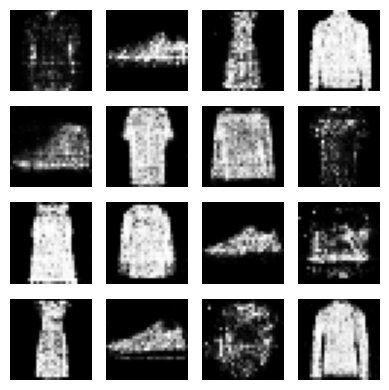

In [15]:
# Generate and visualize images after training
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    generated_imgs = generator(z).cpu()

# Plot the generated images
fig, axs = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(generated_imgs[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


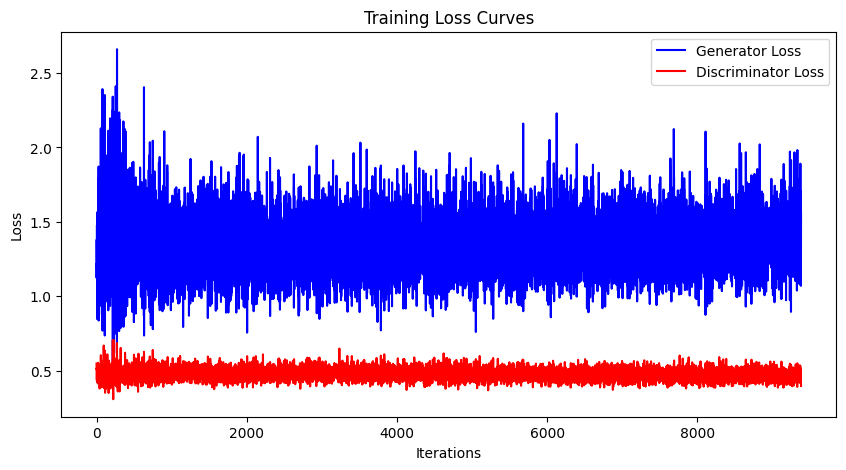

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label='Generator Loss', color='blue')
plt.plot(d_losses, label='Discriminator Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.show()